In [1]:
from xcube.core.store.store import find_data_store_extensions
from xcube.core.store.store import get_data_store_params_schema
from xcube.core.store.store import new_data_store
from IPython.display import JSON

Which data stores are available?

In [2]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

d:\projects\xcube\xcube\util\plugin.py:166: UserWarning: module 'xcube_core_store' looks like an xcube-plugin but lacks a callable named 'init_plugin'
  warnings.warn(f'module {module_name!r} looks like an xcube-plugin '


<IPython.core.display.JSON object>

Get a specific store

Usually we need more information to get the actual data store object. Which data store parameters are available?

In [3]:
get_data_store_params_schema('directory')

Just provide mandatory parameters to instantiate the store class:

In [4]:
store = new_data_store('directory', base_dir='../serve/demo')
store

Which datasets are provided? (the list may contain both gridded and vector datasets):

In [25]:
JSON(list(store.get_data_ids()))

<IPython.core.display.JSON object>

Get more info about a dedicated dataset. This include a description of the possible open formats:

In [7]:
store.describe_data('cube-1-250-250.zarr')

dataset zarr posix


Which parameters must I pass or are available to open the dataset?

In [24]:
store.get_open_data_params_schema('cube-1-250-250.zarr')

dataset zarr posix


There are no required parameters, so we can open the dataset without any parameters:

In [16]:
dataset = store.open_data('cube-1-250-250.zarr')
dataset

dataset zarr posix


<xarray.Dataset>
Dimensions:        (bnds: 2, lat: 1000, lon: 2000, time: 5)
Coordinates:
  * lat            (lat) float64 52.5 52.5 52.49 52.49 ... 50.01 50.01 50.0 50.0
    lat_bnds       (lat, bnds) float64 dask.array<chunksize=(250, 2), meta=np.ndarray>
  * lon            (lon) float64 0.00125 0.00375 0.00625 ... 4.994 4.996 4.999
    lon_bnds       (lon, bnds) float64 dask.array<chunksize=(250, 2), meta=np.ndarray>
  * time           (time) datetime64[ns] 2017-01-16T10:09:21.834255872 ... 2017-01-30T10:46:33.836892416
    time_bnds      (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    c2rcc_flags    (time, lat, lon) float64 dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    conc_chl       (time, lat, lon) float64 dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    conc_tsm       (time, lat, lon) float64 dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    kd489          (time, lat, lon) float64 dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    quality_flags  (time, lat, lon) float64 dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.7

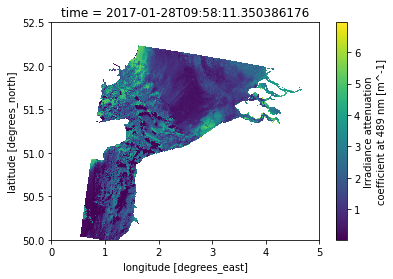

In [23]:
dataset.kd489.isel(time=3).plot.imshow()